In [1]:
import sys
sys.path.insert(0, 'C:/Users/Can/Dropbox/PC (2)/Desktop/My Numerical Calculations/Single Particle/Hofstadter')
#from Hofstadter_Matrix_in_k_space import *

In [2]:
import numpy as np

# Define Harper-Hofstadter Matrix
def H(p,q,kx,ky):
    
    # Define magnetic flux per unit-cell
    alpha = p/q
    
    # qxq size of zero matrix
    M = np.zeros((q,q), dtype=complex)
    
    for i in range(0,q):
        # Ortogonal elements of matris
        M[i,i] = 2*np.cos(ky-2*np.pi*alpha*i)
        # Other elements
        if i==q-1: 
            M[i,i-1]=1
        elif i==0: 
            M[i,i+1]=1
        else: 
            M[i,i-1]=1
            M[i,i+1]=1
            
    # Bloch condition
    if q==2:
        M[0,q-1] = 1+np.exp(-q*1.j*kx)
        M[q-1,0] = 1+np.exp(q*1.j*kx)
    else:
        M[0,q-1] = np.exp(-q*1.j*kx)
        M[q-1,0] = np.exp(q*1.j*kx)
        
    return M

In [3]:
# Plotting
import matplotlib.pyplot as plt

# Function to set irrational values for alpha
def gcd(a, b): 
    if b == 0: return a
    return gcd(b, a % b)

def plot_butterfly(q_max):
    
    # Iterations over alpha values
    for p in range(1, q_max+1):
        for q in range(1, q_max+1):
            
            # Set alpha rational values less than 1
            if q>p:
                if gcd(p, q) == 1:
                    # Define alpha
                    alpha = p/q
                    y = np.zeros(q)
                    y[:] = alpha
                    
                    # Eigenvalues of Harper-Hofstadter matrix for each k values
                    x1 = np.linalg.eigvalsh(H(p,q,kx=0, ky=0))
                    x2 = np.linalg.eigvalsh(H(p,q,kx=np.pi/q, ky=np.pi/q))
                    
                    # Tip (0<k_i<pi/q) of eigenvalues (x1, x2) merge with lines
                    for i in range(len(x1)):
                        plt.plot([x1[i],x2[i]], y[:2], '-', c="black", markersize=0.1)
                    
                    # Plot each energies 
                    plt.plot(x1, y, 'o', c="black", markersize=0.1)
                    plt.plot(x2, y, 'o', c="black", markersize=0.1)

    plt.xlabel(r'$\epsilon$', fontsize=15)
    plt.ylabel(r'$\alpha$', fontsize=15)
    plt.title(r'$q=1-$'+str(q_max))  
    
    return 

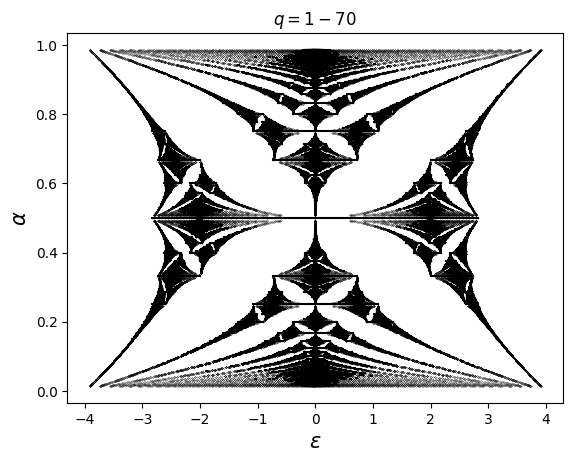

In [4]:
# Maximum of matrix size (q)
q_max = 70

# Plot Hofstadter Butterfly
plot_butterfly(q_max)

# Save it!
plt.savefig('Butterfly.png', dpi=300)